# Test task for Scorista employment
# By Vitaly Petrov (https://github.com/VitalyPetrov)

## Data uploading and first look

In the following notebook I will present the results of my processing of given clients features data in order to predict certain targets ('Status' dataset column)

At first, let us import all the necessary modules and set default plotting parameters

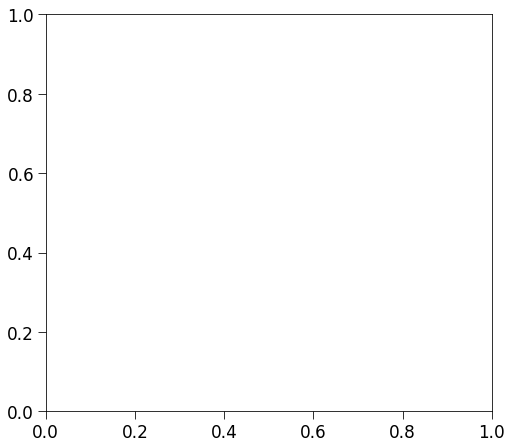

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

plt.style.use("seaborn-deep")

plt.rcParams['figure.figsize'] = (8, 7.3)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['axes.edgecolor'] = 'black'

plt.tick_params(size = 8 ,labelsize = 'large')


font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 14}

rc('font', **font)

Upload the data from .xlsx file

In [40]:
data = pd.read_excel('data.xlsx')

data

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,...,Factor_68,Factor_69,Factor_70,Factor_71,Factor_72,Factor_73,Factor_74,Factor_75,STATUS,Балл
0,0.333333,0.014545,0.666667,153923,0,0.000000,0.000000,153923,153923,0,...,0.500000,1059,0.003636,0,0,0,0,0,1,NaN
1,0.727273,0.309942,0.954545,338179,2,0.866667,14296.266670,285955,22963,3,...,0.022727,41,0.005848,0,0,1,2,0,0,NaN
2,0.000000,0.000000,0.000000,0,1,0.000000,0.000000,0,0,1,...,0.000000,6,0.000000,0,0,0,0,0,0,NaN
3,1.000000,1.000000,1.000000,38969,3,2.666667,12989.666670,50977,30325,3,...,0.000000,40,0.000000,0,0,0,0,0,0,NaN
4,1.000000,0.206897,0.666667,3000,1,1.000000,1500.000000,8000,3000,1,...,0.333333,6,0.137931,0,0,0,0,0,1,NaN
5,0.000000,0.653846,1.000000,0,3,4.000000,10117.000000,0,0,3,...,0.333333,59,0.000000,1,2,2,0,1,0,NaN
6,0.608696,0.441520,0.782609,580700,1,0.000000,0.000000,651014,352291,1,...,0.304348,557,0.002924,0,0,0,0,0,1,NaN
7,0.571429,0.531915,0.571429,2452,0,0.000000,0.000000,25000,2452,0,...,0.142857,9,0.063830,0,0,0,0,0,0,NaN
8,0.181818,0.061497,0.818182,0,0,0.000000,0.000000,0,0,0,...,0.818182,473,0.013369,0,0,0,0,0,1,NaN
9,0.777778,0.543568,0.833333,998292,0,0.000000,0.000000,696176,245497,0,...,0.333333,40,0.006224,0,0,0,0,0,0,NaN


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 77 columns):
Factor_1     6394 non-null float64
Factor_2     6394 non-null float64
Factor_3     6394 non-null float64
Factor_4     6394 non-null int64
Factor_5     6394 non-null int64
Factor_6     6394 non-null float64
Factor_7     6394 non-null float64
Factor_8     6394 non-null int64
Factor_9     6394 non-null int64
Factor_10    6394 non-null int64
Factor_11    6394 non-null float64
Factor_12    6394 non-null int64
Factor_13    6394 non-null int64
Factor_14    6394 non-null int64
Factor_15    6394 non-null int64
Factor_16    6394 non-null int64
Factor_17    6394 non-null float64
Factor_18    6394 non-null float64
Factor_19    6394 non-null int64
Factor_20    6394 non-null float64
Factor_21    6394 non-null float64
Factor_22    6394 non-null float64
Factor_23    6394 non-null float64
Factor_24    6394 non-null float64
Factor_25    6394 non-null int64
Factor_26    6394 non-null float64
Factor_

In [42]:
data.describe()

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,...,Factor_68,Factor_69,Factor_70,Factor_71,Factor_72,Factor_73,Factor_74,Factor_75,STATUS,Балл
count,6394.000000,6394.000000,6394.000000,6.394000e+03,6394.000000,6394.000000,6.394000e+03,6.394000e+03,6.394000e+03,6394.000000,...,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,0.0
mean,0.630109,0.453784,0.774382,2.735900e+05,2.731467,1.189705,8.975241e+03,2.407472e+05,1.211434e+05,3.221927,...,0.348230,410.21442,0.067832,0.553331,1.148420,0.728495,0.271505,0.553331,0.322646,NaN
std,0.292184,0.278495,0.257964,9.505452e+05,4.527406,1.620388,3.680669e+04,6.999517e+05,6.823942e+05,5.521740,...,0.545786,768.08398,0.151400,1.591975,3.419521,1.808814,1.007299,1.591975,0.467525,NaN
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.500000,0.214286,0.666667,3.070250e+03,0.000000,0.000000,0.000000e+00,5.000000e+03,2.600250e+03,0.000000,...,0.000000,13.00000,0.002064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.666667,0.454716,0.848485,4.177050e+04,1.000000,0.777778,3.304286e+03,4.700000e+04,2.037900e+04,1.000000,...,0.142857,42.00000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.857143,0.690931,1.000000,2.163698e+05,3.000000,1.555556,1.002923e+04,2.119912e+05,8.204350e+04,4.000000,...,0.500000,372.00000,0.055046,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,NaN
max,1.000000,1.000000,1.000000,4.297562e+07,52.000000,12.000000,1.790789e+06,3.053000e+07,4.241549e+07,72.000000,...,11.000000,4571.00000,1.000000,29.000000,93.000000,24.000000,15.000000,29.000000,1.000000,NaN


We see from the table that features differ strongly from each other (see, for example, 'mean' or 'std' row). It may cause a serious error while model training so I will take it into account while data preprocessing

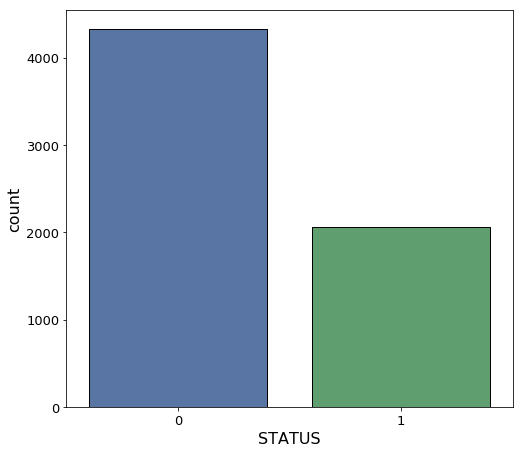

In [43]:
sns.countplot(data['STATUS'])

The distribution of classes is not equal -- the count is "0" samples is ~2 times higher than the "1" ones. It also may cause problems in the nearest future so we need to make a certain correction. I will do it by performing standart oversampling procedure. Not the brute force version(just simply dublicate "1" samples and add it to dataser) but more intelligent one (simply increase the corresponding weights on loss function)

Finally, let us split the features and target column and check the pair-wise correlations of features

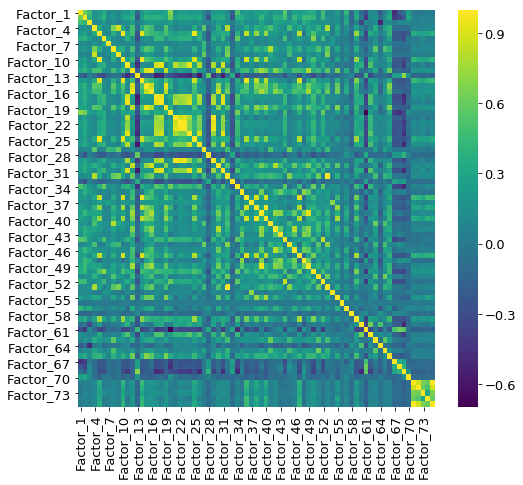

In [44]:
features = data.drop(['STATUS', 'Балл'], axis=1) 
target = data['STATUS']

sns.heatmap(features.corr(), cmap='viridis')

We see from the figure that there certain features which obviously are correlated (not independent). Surely we should drop them from the consideration to design the most accurate model. I will do it not manually but using Lasso regression (L1) which posses this wonderful feature

## Data preprocessing

Before to train the model we need to handle the problem of different orders of magnitude between different features --> perform features scaling

$$ x^{scaled}_{id} = \dfrac{x_{id} - \mu_d}{\sigma_d}, \quad \mu_d = \frac{1}{N} \sum_{i=1}^l x_{id}, \quad \sigma_d = \sqrt{\frac{1}{N-1} \sum_{i=1}^l (x_{id} - \mu_d)^2} $$

In [46]:
features = ( features - features.mean() ) / features.std()

In [47]:
features

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,...,Factor_66,Factor_67,Factor_68,Factor_69,Factor_70,Factor_71,Factor_72,Factor_73,Factor_74,Factor_75
0,-1.015716,-1.577191,-0.417557,-0.125893,-0.603318,-0.734210,-0.243848,-0.124043,0.048036,-0.583498,...,-0.571370,1.265612,0.278075,0.844681,-0.424019,-0.347575,-0.335842,-0.402748,-0.269537,-0.347575
1,0.332544,-0.516499,0.698407,0.067949,-0.161564,-0.199359,0.144567,0.064587,-0.143876,-0.040191,...,-0.571370,-0.269302,-0.596394,-0.480695,-0.409408,-0.347575,-0.335842,0.150101,1.715970,-0.347575
2,-2.156549,-1.629418,-3.001903,-0.287824,-0.382441,-0.734210,-0.243848,-0.343948,-0.177527,-0.402396,...,-0.571370,-0.511660,-0.638035,-0.526263,-0.448035,-0.347575,-0.335842,-0.402748,-0.269537,-0.347575
3,1.265953,1.961314,0.874614,-0.246828,0.059313,0.911487,0.109068,-0.271119,-0.133088,-0.040191,...,1.109100,-0.511660,-0.638035,-0.481997,-0.448035,-0.347575,-0.335842,-0.402748,-0.269537,-0.347575
4,1.265953,-0.886506,-0.417557,-0.284668,-0.382441,-0.117074,-0.203095,-0.332519,-0.173131,-0.402396,...,-0.571370,-0.511660,-0.027295,-0.526263,0.463005,-0.347575,-0.335842,-0.402748,-0.269537,-0.347575
5,-2.156549,0.718368,0.874614,-0.287824,0.059313,1.734335,0.031020,-0.343948,-0.177527,-0.040191,...,-0.571370,-0.511660,-0.027295,-0.457260,-0.448035,0.280575,0.249035,0.702949,-0.269537,0.280575
6,-0.073286,-0.044038,0.031894,0.323088,-0.382441,-0.734210,-0.243848,0.586136,0.338730,-0.402396,...,0.268865,0.415613,-0.080402,0.191106,-0.428721,-0.347575,-0.335842,-0.402748,-0.269537,-0.347575
7,-0.200832,0.280546,-0.786749,-0.285245,-0.603318,-0.734210,-0.243848,-0.308232,-0.173934,-0.583498,...,0.268865,-0.511660,-0.376289,-0.522357,-0.026435,-0.347575,-0.335842,-0.402748,-0.269537,-0.347575
8,-1.534277,-1.408599,0.169793,-0.287824,-0.603318,-0.734210,-0.243848,-0.343948,-0.177527,-0.583498,...,-0.571370,2.881319,0.861055,0.081743,-0.359732,-0.347575,-0.335842,-0.402748,-0.269537,-0.347575
9,0.505398,0.322389,0.228526,0.762407,-0.603318,-0.734210,-0.243848,0.650657,0.182231,-0.583498,...,1.949335,0.376979,-0.027295,-0.481997,-0.406925,-0.347575,-0.335842,-0.402748,-0.269537,-0.347575


As it s done let us perform train-test split of the dataset to train the model and evaluate it s quality

In [69]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.3,
                                                                            stratify=target
                                                                            )

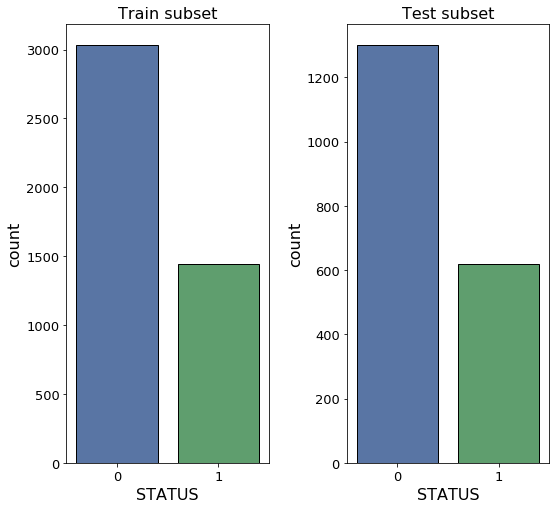

In [95]:
plt.subplot(121)
plt.title('Train subset')
sns.countplot(target_train)
plt.subplot(122)
plt.title('Test subset')
sns.countplot(target_test)

plt.tight_layout()

So the stratification works -- we get identical distributions for both train and test subsets 

Now all we have to do is to select an appropriate model and train it on our based including, of course, correction for the classes to be non-balanced (I mentioned it at previous subsection)

## Logistic regression


$\underline{Nota \text{ } bene}$: It is important to set class_weights kward to 'balanced' while LogisticRegression object initializing in order to account misbalance of "0" and "1" classes (see the first subsection for more details). 

$\bf{L1-penalty}$ (Lasso) is used to filter correlated features

In [136]:
logistic_regressor = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [137]:
logistic_regressor.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [142]:
params_grid = {'C': [1.0e-2, 1.0e-1, 1.0, 10, 100, 1000]}

lr_estimator = GridSearchCV(logistic_regressor, params_grid, cv=5)
lr_estimator.fit(features_train, target_train)
lr_estimator.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [143]:
target_predicted = lr_estimator.predict_proba(features_test)[:, 1]
from sklearn.metrics import roc_auc_score


roc_auc_score(target_test, target_predicted)

0.7261091089847148